In [ ]:
import numpy as np
from keras import datasets
from keras.utils import np_utils
from keras import models, layers

import matplotlib.pyplot as plt

### FashionMNIST 데이터를 가지고 와서 레이어 2개 이상의 NN을 만들어보자

In [ ]:
(X_train, y_train), (X_test, y_test) = datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


    **Fashion_mnist**

    0	T-shirt/top
    1	Trouser
    2	Pullover
    3	Dress
    4	Coat
    5	Sandal
    6	Shirt
    7	Sneaker
    8	Bag
    9	Ankle boot


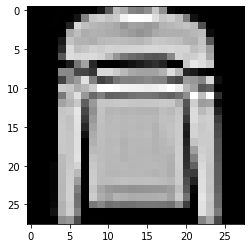

In [ ]:
plt.imshow(X_train[5], cmap='gray')

In [ ]:
# preprocessing
X_train = X_train.reshape(-1, X_train.shape[1] * X_train.shape[2]) / 255
X_test = X_test.reshape(-1, X_test.shape[1] * X_test.shape[2]) / 255

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [ ]:
# model define
model = models.Sequential()
model.add(layers.Dense(100, activation='relu', input_shape=(784,)))
model.add(layers.Dropout(.4))
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dropout(.4))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.compile('adam','categorical_crossentropy', metrics=['accuracy'])

In [ ]:
def plot_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch') # X 측이 늘어남에 따라서 Y축이 얼마나 떨어지는가가 궁금한것이다.
    plt.legend(['Train','Validation'])
    
def plot_acc(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train','Validation'])

    Validation Test를 해야하는 이유

    validation에서 현재epoch val loss평균이 이전 epoch크면 무시하고 더 낮은것만 계속 저장한다.
    -> why? -> test시에 학습에서 loss가 잘못 나온 지점에서 test가 되는것을 막기 위해서

In [ ]:
model.fit(X_train, y_train, epochs=30, batch_size=100, validation_split=.2, verbose=2)

Epoch 1/30
480/480 - 3s - loss: 0.8902 - accuracy: 0.6904 - val_loss: 0.4755 - val_accuracy: 0.8273
Epoch 2/30
480/480 - 1s - loss: 0.5726 - accuracy: 0.8006 - val_loss: 0.4294 - val_accuracy: 0.8432
Epoch 3/30
480/480 - 1s - loss: 0.5123 - accuracy: 0.8221 - val_loss: 0.4247 - val_accuracy: 0.8456
Epoch 4/30
480/480 - 1s - loss: 0.4845 - accuracy: 0.8294 - val_loss: 0.3995 - val_accuracy: 0.8507
Epoch 5/30
480/480 - 1s - loss: 0.4678 - accuracy: 0.8364 - val_loss: 0.3817 - val_accuracy: 0.8594
Epoch 6/30
480/480 - 1s - loss: 0.4503 - accuracy: 0.8414 - val_loss: 0.3733 - val_accuracy: 0.8632
Epoch 7/30
480/480 - 1s - loss: 0.4348 - accuracy: 0.8458 - val_loss: 0.3693 - val_accuracy: 0.8649
Epoch 8/30
480/480 - 1s - loss: 0.4258 - accuracy: 0.8494 - val_loss: 0.3607 - val_accuracy: 0.8693
Epoch 9/30
480/480 - 1s - loss: 0.4175 - accuracy: 0.8516 - val_loss: 0.3680 - val_accuracy: 0.8663
Epoch 10/30
480/480 - 1s - loss: 0.4107 - accuracy: 0.8541 - val_loss: 0.3555 - val_accuracy: 0.8723

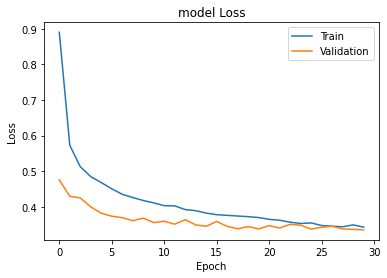

In [ ]:
plot_loss(model.history)

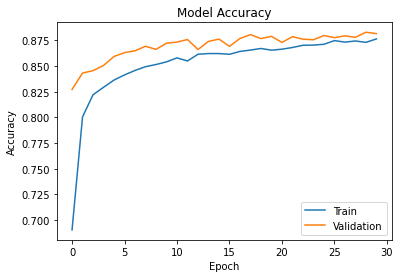

In [ ]:
plot_acc(model.history)

In [ ]:
# evaluation
model_performance = model.evaluate(X_test, y_test, batch_size=100)
print('loss: {}\nAccuray: {}'.format(*model_performance))

100/100 [==============================] - 0s 2ms/step - loss: 0.3598 - accuracy: 0.8729
loss: 0.3598073124885559
Accuray: 0.8729000091552734


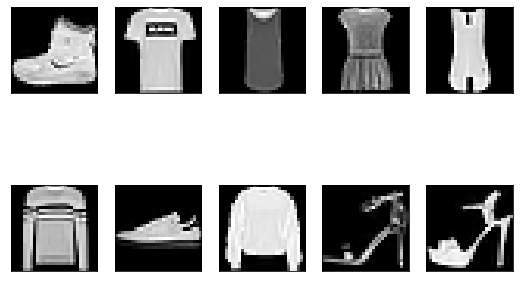

In [ ]:
row = 2
col = 5

grid = range(10)
fig, axs = plt.subplots(nrows=row, ncols=col, figsize=(9,6),
                       subplot_kw={'xticks':[ ], 'yticks':[]}) 

for ax, index in zip(axs.flat,grid): 
    ax.imshow(X_train[index].reshape(28,28),interpolation='none',cmap='gray')
plt.show()
